<div style="background: linear-gradient(to bottom, #8e44ad, #9b59b6); padding: 20px; border-radius: 15px; text-align: center; font-family: 'Poppins', sans-serif; color: #ffffff; box-shadow: 0 8px 20px rgba(0, 0, 0, 0.2);">
    <h1 style="font-size: 3em; font-weight: bold; color: #ffffff; text-shadow: 2px 2px 8px rgba(0, 0, 0, 0.5);">Live Your Music ! </h1>
    <hr style="border: 2px solid rgba(255, 255, 255, 0.8); width: 75%; margin: 15px auto;">
    <h2 style="font-size: 2em; font-weight: 500; color: #ffffff; text-shadow: 1px 1px 5px rgba(0, 0, 0, 0.3);">Webscrapping Machine Learning Model</h2>
    <div style="font-size: 1.4em; margin-top: 15px;">
        <p><strong>Team Members:</strong> EL HACHEM Gabriel, FALCK Jade, LE QUERNEC Loévan</p>
        <p><strong>Class:</strong> DIA2</p>
    </div>
    <div style="margin-top: 20px; display: flex; justify-content: center; align-items: center; gap: 8px;">
        <div style="background: #ffffff; width: 15px; height: 15px; border-radius: 50%;"></div>
        <div style="background: rgba(255, 255, 255, 0.8); width: 12px; height: 12px; border-radius: 50%;"></div>
        <div style="background: #ffffff; width: 15px; height: 15px; border-radius: 50%;"></div>
    </div>
</div>

## Imports

In [1]:
import pandas as pd
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Data Cleaning

Let's import our excel file of Paris events.

In [4]:
df = pd.read_excel("Events_paris.xlsx")

We decide to drop the columns that we won't use for our model.

In [7]:
events_data = df[["name", "moods", "performer", "location.name", "organizer.name", "description",]]

In [8]:
events_data_short = events_data.sample(100)
events_data_short

,name,moods,performer,location.name,organizer.name,description
642,Gala D'hiver - Bde Médusa,"classical,rap,r&b,reggaeton",[],Le Salon des Miroirs,BDE MEDUSA - IPAG,GALA D'HIVER IPAG – VENDREDI 24 JANVIER\n\nPlo...
940,Tea Or Coffee #6,NaN,[],Au Café de Paris,Tea or Coffee,"On ne va pas se mentir, vous avez littéralemen..."
253,Back To The 2000s - Hip-Hop Et Dance 2000,"pop,dance,r&b,hip hop,reggaeton",[],Jump in bastille,Jump in Bastille,FLASHBACK - Les Hits des Années 2000 au Jump I...
214,Kalsovybz #5,"afro,afrobeat,dancehall,r&b,hip hop,rap","[{'@type': 'MusicGroup', 'name': 'KAABS MCQUEE...",Folie's Pigalle,KalsoVybz,HAPPY NEW YEAR 2025 ✨ \nPour bien commencer ce...
1169,Back To The 90’ - 2000’ (6 Mars),NaN,[],Hide Pub / Club Châtelet,PartyEvents,On va vous faire revivre le meilleurs des tube...
...,...,...,...,...,...,...
324,Karapéro #2,"pop,pop rock,rap,r&b,k-pop,hip hop",[],SHYWAWA,Shywawa,"Voix, Cocktails & Vibes : Le Karapéro du Shywa..."
145,Open Format By Guru #21,"house,hip hop,r&b,rap,dance","[{'@type': 'MusicGroup', 'name': 'Guillaume Ha...",Guru Club,guru paris,🌟 OPEN FORMAT 🍾\n📅 VENDREDI 10 JANVIER de 23h...
407,Paris Calling - Mia Mao Opening : Laurent Garn...,"techno,house,electro","[{'@type': 'MusicGroup', 'name': 'Mia Mao', 'u...",Mia Mao,Mia Mao,"PARIS CALLING\nLe vendredi 17 janvier, Mia Mao..."
753,Pentagon Invite Demi Riquísimo & Vitamine @Lajava,"house,electro,progressive house","[{'@type': 'MusicGroup', 'name': 'Demi Riquísi...",La Java,LA JAVA,Pentagon démarre l'année 2025 sur les chapeaux...


In [56]:
from googletrans import Translator

In [76]:
# Initialiser le traducteur
translator = Translator()

def translate_text(text, target_language="en"):
    """
    Traduit un texte dans la langue cible en utilisant googletrans.
    """
    if isinstance(text, str) and text.strip():
        try:
            translation = translator.translate(text, dest=target_language)
            return translation.text
        except Exception as e:
            print(f"Erreur lors de la traduction : {e}")
            return text  # Retourne le texte original en cas d'erreur
    return text  # Retourne tel quel si ce n'est pas une chaîne valide

In [77]:
events_data_short['description_en'] = events_data_short['description'].apply(translate_text)
events_data_short

C:\Users\gabyg\AppData\Local\Temp\ipykernel_2168\3875906305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_data_short['description_en'] = events_data_short['description'].apply(translate_text)


,@context,@type,name,url,image,startDate,doorTime,endDate,eventStatus,eventAttendanceMode,...,location.address.postalCode,location.address.addressCountry,location.geo.@type,location.geo.latitude,location.geo.longitude,organizer.@type,organizer.name,organizer.url,moods,description_en
0,https://schema.org,MusicEvent,Hypershot — Jespfur (+) Bby Eco (+) Izzy Camin...,https://shotgun.live/fr/events/hypershot-jespf...,https://res.cloudinary.com/shotgun/image/uploa...,2025-02-06T18:30:00.000Z,2025-02-06T18:30:00.000Z,2025-02-06T22:30:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75011.0,FR,GeoCoordinates,48.853528,2.375755,Organization,BADABOUM,https://shotgun.live/fr/venues/badaboum-club,"pop,electro",📍 Thursday February 06 - 7:30 p.m./11:30 p.m.\...
1,https://schema.org,MusicEvent,"Organïk Hard Psy Edition: La Penderie Noire, M...",https://shotgun.live/fr/events/organik-hard-ps...,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-09T22:59:00.000Z,2025-01-09T22:59:00.000Z,2025-01-10T06:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75002.0,FR,GeoCoordinates,48.870573,2.347382,Organization,REX CLUB,https://shotgun.live/fr/venues/rex-club,"electro,hard techno,techno,psytrance","2025, it is also for us synonymous with a new ..."
2,https://schema.org,MusicEvent,Complet - Jolagreen23 - La Cigale,https://shotgun.live/fr/events/jolagreen-23-la...,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-09T19:00:00.000Z,2025-01-09T19:00:00.000Z,2025-01-09T22:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75018.0,FR,GeoCoordinates,48.882519,2.340163,Organization,PEDRO BOOKING,https://shotgun.live/fr/venues/pedro-booking,rap,"Jolagreen23, January 09 2025, La Cigale\n\nSit..."
3,https://schema.org,MusicEvent,Jukebox 09/01,https://shotgun.live/fr/events/jukebox-09-01,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-09T22:45:00.000Z,2025-01-09T22:45:00.000Z,2025-01-10T04:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75008.0,FR,GeoCoordinates,48.870700,2.309207,Organization,Stargazing Group,https://shotgun.live/fr/venues/lalaland,NaN,🎤🎶 jukebox evening: the night when everyone is...
4,https://schema.org,MusicEvent,Malaa,https://shotgun.live/fr/events/malaa,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-09T22:00:00.000Z,2025-01-09T22:00:00.000Z,2025-01-10T04:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75013.0,FR,GeoCoordinates,48.841110,2.369852,Organization,34 QUAI D'AUSTERLITZ,https://shotgun.live/fr/venues/34-quai-d-auste...,NaN,PARTY BAD ALBUM\nMONDIAL EXCLU\n34 WHICH AUSTERLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://schema.org,MusicEvent,Claclaclac! X Atipik Weekender,https://shotgun.live/fr/events/claclaclac-x-at...,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-10T19:00:00.000Z,2025-01-10T19:00:00.000Z,2025-01-12T06:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,93500.0,FR,GeoCoordinates,48.904173,2.400496,Organization,claclaclac,https://shotgun.live/fr/venues/claclaclac,"house,techno,breakbeat,downtempo",claclaclac! x atipik weekender\n\ninvitation t...
96,https://schema.org,MusicEvent,Sacré Présente : Carte Blanche Laurence Guy,https://shotgun.live/fr/events/laurenceguy,https://res.cloudinary.com/shotgun/image/uploa...,2025-01-10T22:00:00.000Z,2025-01-10T22:00:00.000Z,2025-01-11T05:00:00.000Z,https://schema.org/EventScheduled,https://schema.org/OfflineEventAttendanceMode,...,75002.0,FR,GeoCoordinates,48.869067,2.343365,Organization,SACRÉ,https://shotgun.live/fr/venues/sacre,house,If the ticket office displays Sold Out but don...
97,https://schema.org,MusicEvent,"Wizz : Ma Sha, Lu2k, Tamada, Stl-P",https://shotgun.live/fr/events/wizz,https://res.cloudinary.co

We wille only use the columns 'description', 'name' and 'moods' for our model. 
Let's delete or replace the none values.

In [78]:
# Sélectionner les colonnes utiles à notre modèle
useful_columns = ['description_en','description', 'name', 'moods']
filtered_data = events_data_short[useful_columns]

# Supprimer les lignes où la colonne 'description' est vide
filtered_data = filtered_data.dropna(subset=['description_en'])

# Remplacer les valeurs manquantes dans les colonnes 'name' et 'moods' par des chaînes vides
filtered_data['name'] = filtered_data['name'].fillna('')
filtered_data['moods'] = filtered_data['moods'].fillna('')

# Combiner les colonnes 'name' et 'moods' avec 'description' pour créer une colonne plus riche
filtered_data['description_combined'] = (
    filtered_data['description_en'] + " " + filtered_data['name'] + " " + filtered_data['moods']
)

Clean the column 'Description'.

In [79]:
def clean_text(text):
    """
    Nettoyage du texte :
    - Supprimer les caractères spéciaux
    - Mettre en minuscules
    - Supprimer les chiffres
    """
    if isinstance(text, str):
        text = text.replace("\n", " ") 
        text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', "", text)  # Supprimer les caractères non alphabétiques
        text = text.lower()  # Mettre en minuscules
        text = re.sub(r"\s+", " ", text).strip()  # Supprimer les espaces multiples
        return text
    return text  # Retourner les valeurs non-string inchangées

In [80]:
filtered_data['description_clean'] = filtered_data['description_combined'].apply(clean_text)
filtered_data

,description_en,description,name,moods,description_combined,description_clean
0,📍 Thursday February 06 - 7:30 p.m./11:30 p.m.\...,📍 Jeudi 06 Février - 19h30/23h30\nConcert : Hy...,Hypershot — Jespfur (+) Bby Eco (+) Izzy Camin...,"pop,electro",📍 Thursday February 06 - 7:30 p.m./11:30 p.m.\...,thursday february pm pm concert hypershot jesp...
1,"2025, it is also for us synonymous with a new ...","2025, c’est aussi pour nous synonyme d’une nou...","Organïk Hard Psy Edition: La Penderie Noire, M...","electro,hard techno,techno,psytrance","2025, it is also for us synonymous with a new ...",it is also for us synonymous with a new artist...
2,"Jolagreen23, January 09 2025, La Cigale\n\nSit...","JOLAGREEN23, 09JANVIER 2025, LA CIGALE\n\nASSI...",Complet - Jolagreen23 - La Cigale,rap,"Jolagreen23, January 09 2025, La Cigale\n\nSit...",jolagreen january la cigale sittingfree placem...
3,🎤🎶 jukebox evening: the night when everyone is...,🎤🎶 Jukebox Soirée : La Nuit où Tout le Monde C...,Jukebox 09/01,,🎤🎶 jukebox evening: the night when everyone is...,jukebox evening the night when everyone is sin...
4,PARTY BAD ALBUM\nMONDIAL EXCLU\n34 WHICH AUSTERLY,MALAA ALBUM RELEASE PARTY\nEXCLU MONDIALE\n34 ...,Malaa,,PARTY BAD ALBUM\nMONDIAL EXCLU\n34 WHICH AUSTE...,party bad album mondial exclu which austerly m...
...,...,...,...,...,...,...
95,claclaclac! x atipik weekender\n\ninvitation t...,claclaclac! x atipik weekender\n\ninvitation t...,Claclaclac! X Atipik Weekender,"house,techno,breakbeat,downtempo",claclaclac! x atipik weekender\n\ninvitation t...,claclaclac x atipik weekender invitation to th...
96,If the ticket office displays Sold Out but don...,Si la billetterie affiche sold out mais pas de...,Sacré Présente : Carte Blanche Laurence Guy,house,If the ticket office displays Sold Out but don...,if the ticket office displays sold out but don...
97,Wizz is back on 10/10 Ephémère point with a 10...,WiZz est de retour le 10/10 à Point Ephémère a...,"Wizz : Ma Sha, Lu2k, Tamada, Stl-P","bass,techno",Wizz is back on 10/10 Ephémère point with a 10...,wizz is back on ephémère point with a bass tec...
98,Red Friday,LE ROUGE FRIDAY,Le Rouge Friday - Vendredi 10 Janvier,"r&b,rap,reggaeton,afro,trap,hip hop",Red Friday Le Rouge Friday - Vendredi 10 Janvi...,red friday le rouge friday vendredi janvier rb...


In [81]:
# Identifier les mots fréquents et n-grams
def get_frequent_words(texts, n=10, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    word_matrix = vectorizer.fit_transform(texts)
    word_counts = word_matrix.sum(axis=0).A1
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    return Counter(word_freq).most_common(n)

# Mots fréquents (unigrammes)
frequent_words = get_frequent_words(filtered_data["description_clean"], n=10, ngram_range=(1, 1))

# N-grams fréquents (bigrams)
frequent_bigrams = get_frequent_words(filtered_data["description_clean"], n=10, ngram_range=(2, 2))

In [82]:
frequent_words

[('paris', 73),
 ('club', 61),
 ('pm', 58),
 ('evening', 56),
 ('music', 54),
 ('dj', 51),
 ('night', 47),
 ('new', 43),
 ('entry', 42),
 ('house', 42)]

In [83]:
frequent_bigrams

[('reserves right', 16),
 ('friday january', 13),
 ('practical info', 12),
 ('free entry', 11),
 ('management reserves', 11),
 ('bass music', 10),
 ('january pm', 10),
 ('right refuse', 10),
 ('benge benge', 9),
 ('establishment reserves', 9)]

First, i want to translat all the descriptions in English. In fact, the tourist don't necesserally speak french. 

In [25]:
from spellchecker import SpellChecker

spell = SpellChecker(language='en')  # Spécifiez le français comme langue

def correct_spelling_french(text):
    """
    Corrige l'orthographe d'un texte en français.
    Remplace les `None` par le mot d'origine si aucune suggestion n'est trouvée.
    """
    if isinstance(text, str):
        words = text.split()
        corrected_words = [
            spell.correction(word) if spell.correction(word) is not None else word
            for word in words
        ]
        return " ".join(corrected_words)
    return text  # Retourner tel quel si ce n'est pas une chaîne

In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk


# Télécharger les ressources nécessaires pour le prétraitement
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Étape 2 : Prétraitement des textes
# Initialiser les outils NLP
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage des textes
def preprocess_text(text):
    # Supprimer les caractères spéciaux et les nombres
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)
    # Convertir en minuscules
    text = text.lower()
    # Tokenisation
    tokens = word_tokenize(text)
    # Suppression des mots vides et lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Reconstruire le texte
    return ' '.join(tokens)

# Appliquer le nettoyage sur la colonne 'description_combined'
filtered_data['description_cleaned'] = filtered_data['description_combined'].apply(preprocess_text)

# Vérifier les premières lignes des textes nettoyés
filtered_data[['description_combined', 'description_cleaned']].head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gabyg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabyg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabyg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabyg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,description_combined,description_cleaned
0,📍 Jeudi 06 Février - 19h30/23h30\nConcert : Hy...,jeudi février hh concert hypershot jespfur bby...
1,"2025, c’est aussi pour nous synonyme d’une nou...",cest aussi synonyme dune nouvelle direction ar...
2,"JOLAGREEN23, 09JANVIER 2025, LA CIGALE\n\nASSI...",jolagreen janvier cigale assisdebout placement...
3,🎤🎶 Jukebox Soirée : La Nuit où Tout le Monde C...,jukebox soirée nuit où tout monde chante amate...
4,MALAA ALBUM RELEASE PARTY\nEXCLU MONDIALE\n34 ...,malaa album release party exclu mondiale quai ...


In [11]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'spacy'

[('h', 1876), ('paris', 1164), ('the', 1068), ('a', 905), ('soirée', 897), ('dj', 875), ('plus', 819), ('club', 802), ('tous', 748), ('house', 611), ('faire', 598), ('place', 576), ('to', 576), ('musique', 568), ('cest', 546), ('tout', 523), ('comme', 485), ('techno', 460), ('of', 453), ('où', 435)]


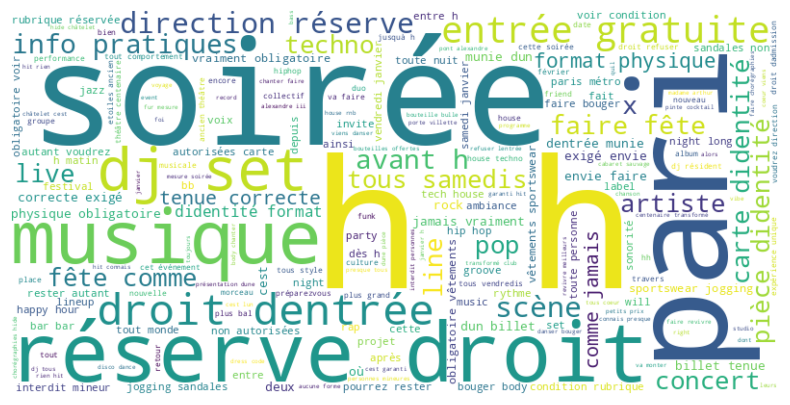

In [9]:
# Fréquence des mots
all_words = " ".join(filtered_data['description_cleaned'])
word_freq = Counter(all_words.split())
print(word_freq.most_common(20))

# Nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from googletrans import Translator

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['description_cleaned'])

# Vérifier la forme de la matrice TF-IDF pour confirmer le traitement
tfidf_matrix.shape

(1410, 5000)

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

# Étape 4 : Calcul des similarités
# Calculer la matrice de similarité cosinus à partir des vecteurs TF-IDF
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Vérifier la forme de la matrice de similarité
cosine_sim_matrix.shape

# Exemple : afficher les scores de similarité pour le premier événement
cosine_sim_matrix[0][:10]  # Similarité entre l'événement 0 et les 10 premiers événements

array([1.        , 0.01287752, 0.04490385, 0.02653926, 0.        ,
       0.00543668, 0.02885213, 0.07827661, 0.06116229, 0.        ])

In [104]:
# Étape 5 : Fonction de recommandation
def recommend_similar_events(event_index, top_n=5):
    """
    Recommande les événements les plus similaires à un événement donné.
    
    :param event_index: Index de l'événement pour lequel on souhaite des recommandations.
    :param top_n: Nombre de recommandations à retourner.
    :return: DataFrame contenant les événements similaires, leurs scores et informations.
    """
    # Récupérer les scores de similarité pour l'événement donné
    similarity_scores = cosine_sim_matrix[event_index]
    
    # Trier les indices des événements par score de similarité décroissant (exclure l'événement lui-même)
    similar_indices = similarity_scores.argsort()[::-1][1:top_n + 1]
    
    # Récupérer les événements similaires avec leurs scores
    recommendations = filtered_data.iloc[similar_indices][['description', 'name', 'moods']]
    recommendations['similarity_score'] = similarity_scores[similar_indices]
    
    return recommendations

event_index = 814
# Exemple : Recommander 5 événements similaires pour l'événement à l'index 0
similar_events = recommend_similar_events(event_index, top_n=5)

 # Construire l'affichage
print(f"Événement de référence : {filtered_data.iloc[event_index]['name']}\n")
print("Recommandations :")
for idx, row in similar_events.iterrows():
    name = row['name']
    moods = row['moods'] if row['moods'] else "Inconnu"
    print(f"- {name} - {moods}")


Événement de référence : Skit' N Match

Recommandations :
- Splish Splash! By Lili Medd - house
- Quai Du Bonheur #1 - house,italo disco,indie dance,disco,electro
- La Rési-Danse De La Miaou Records #5 - house,uk garage
- Zig Residency #2 - deep house,tech house,techno
- Studio 2054 : Y2k But Make It Techno - Petit Bain - pop,techno,electro,trance,eurodance


In [43]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Charger une liste de stop words (utilisation de sklearn pour éviter les téléchargements)
stop_words = set(ENGLISH_STOP_WORDS)  # Utilisation de mots anglais par défaut

# Fonction de lemmatisation simple (substitution pour ne pas dépendre de NLTK)
def simple_lemmatizer(word):
    return word

# Fonction de pré-traitement NLP sans dépendances externes
def preprocess_text(description):
    # Suppression des caractères spéciaux et mise en minuscule
    description = re.sub(r'[^\w\s]', '', description.lower())
    # Tokenisation (simple split sur les espaces)
    tokens = description.split()
    # Suppression des stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatisation (simple pour l'instant)
    lemmatized_tokens = [simple_lemmatizer(word) for word in tokens]
    # Reconstruction du texte pré-traité
    return " ".join(lemmatized_tokens)

# Appliquer le pré-traitement sur la colonne 'Description'
events_data["Cleaned_Description"] = events_data["Description"].apply(preprocess_text)

# Résultat des premières lignes après pré-traitement
data_preprocessed = events_data[["Description", "Cleaned_Description"]]

# Sauvegarder le fichier avec les descriptions nettoyées pour consultation
#output_path_preprocessed = "Events_paris_preprocessed_no_nltk.xlsx"
#events_data.to_excel(output_path_preprocessed, index=False)

data_preprocessed

,Description,Cleaned_Description
0,📍 Jeudi 06 Février - 19h30/23h30Concert : Hype...,jeudi 06 février 19h3023h30concert hypershot j...
1,🎉 BEER PONG CHALLENGE 🎉L’événement de l’année ...,beer pong challenge lévénement lannée débarque...
2,"Tous les mercredis soirs, au Freedj, en plein ...",tous les mercredis soirs au freedj en plein cœ...
3,"LA FÊTE TOUS LES MERCREDIS !Podium, Bistrot Fe...",la fête tous les mercredis podium bistrot fest...
4,"Voix, Cocktails & Vibes : Le Karapéro du Shywa...",voix cocktails vibes le karapéro du shywawa ch...
...,...,...
1332,Pogo Car Crash Control marque enfin son retour...,pogo car crash control marque enfin son retour...
1333,Vendredi sur Mer a certainement contribué à un...,vendredi sur mer certainement contribué à une ...
1334,Déjà 1000 concerts dans pas moins d’une douzai...,déjà 1000 concerts dans pas moins dune douzain...
1335,RAGE TOUR est fier de vous annoncer ULTRA VOMI...,rage tour est fier vous annoncer ultra vomit e...


In [37]:
# Mise à jour de la liste des genres musicaux avec plus de granularité
genres_keywords_extended = {
    "Techno": ["techno", "rave", "minimal", "acid"],
    "Electro": ["électro", "electro", "edm", "electronique", "électronique"],
    "House":["house"],
    "Hyperpop": ["hyperpop", "hyper-pop", "hyper pop"],
    "Jazz": ["jazz", "blues", "swing", "bop"],
    "Pop": ["pop", "commercial", "hits"],
    "Variété": ["variete", "variéte", "musique française", "musique francaise"],
    "Rock": ["rock", "punk", "grunge", "hard", "indie", "garage", "psychedelic"],
    "Classical": ["classique", "orchestral", "opéra", "symphonie", "baroque", "romantique"],
    "Hip-Hop": ["hip-hop", "rap", "trap", "rnb", "freestyle", "boom bap","808", "drill"],
    "Reggae": ["reggae", "dancehall", "ska", "dub"],
    "Afrobeat": ["afrobeat", "afro", "afrobeats"],
    "Latino": ["latin", "salsa", "bachata", "merengue", "cumbia", "reggaeton", "tango"],
    "Folk": ["folk", "acoustique", "americana", "traditionnel"],
    "Metal": ["metal", "heavy", "thrash", "death", "black"],
    "Funk": ["funk", "soul", "groove", "disco"],
    "World": ["world", "ethnique", "balkan", "tribal"],
    "K-Pop": ["k-pop", "kpop", "korean pop"],
}

# Fonction mise à jour pour attribuer un genre musical plus précis
def assign_genre_extended(description):
    description = description.lower() # Convertir en minuscules pour uniformiser
    genres_detected = []
    for genre, keywords in genres_keywords_extended.items():
        if any(" "+keyword+" " in description for keyword in keywords):
            genres_detected.append(genre)
    # Retourner les genres détectés ou 'Inconnu' si aucun mot-clé trouvé
    return ", ".join(genres_detected) if genres_detected else "Inconnu"

# Appliquer la fonction mise à jour sur la colonne 'Description'
events_data["Genre"] = events_data["Cleaned_Description"].apply(assign_genre_extended)

# Résultat des premières lignes avec les genres attribués
data_with_genres_extended = events_data[["name", "Cleaned_Description", "Genre"]]

# Sauvegarder le fichier avec les genres ajoutés pour consultation
#output_path_extended = "Events_paris_with_genres_extended.xlsx"
#events_data.to_excel(output_path_extended, index=False)

data_with_genres_extended


,name,Cleaned_Description,Genre
0,Hypershot — Jespfur (+) Bby Eco (+) Izzy Camin...,jeudi 06 février 19h3023h30concert hypershot j...,"Pop, Hip-Hop"
1,Beer Pong And Pop Party #2,beer pong challenge lévénement lannée débarque...,Pop
2,Woopiii Reçoit Les Coqs Festifs Pour La Galett...,tous les mercredis soirs au freedj en plein cœ...,Inconnu
3,Disco Inferno - Tous Les Mercredis @Podium - 0...,la fête tous les mercredis podium bistrot fest...,Funk
4,Karapéro,voix cocktails vibes le karapéro du shywawa ch...,Inconnu
...,...,...,...
1332,Pogo Car Crash Control - La Cigale - Paris,pogo car crash control marque enfin son retour...,"Rock, Metal"
1333,Vendredi Sur Mer - La Cigale - Paris,vendredi sur mer certainement contribué à une ...,Pop
1334,Les Yeux Dla Tete,déjà 1000 concerts dans pas moins dune douzain...,Inconnu
1335,Ultra Vomit - Paris,rage tour est fier vous annoncer ultra vomit e...,Metal


In [44]:
# Mise à jour de la liste des genres musicaux avec plus de granularité
genres_keywords_extended = {
    "Techno": ["techno", "rave", "minimal", "acid"],
    "Electro": ["électro", "electro", "edm", "electronique", "électronique"],
    "House":["house"],
    "Hyperpop": ["hyperpop", "hyper-pop", "hyper pop"],
    "Jazz": ["jazz", "blues", "swing", "bop"],
    "Pop": ["pop", "commercial", "hits"],
    "Variété": ["variete", "variéte", "musique française", "musique francaise"],
    "Rock": ["rock", "punk", "grunge", "hard", "indie", "garage", "psychedelic"],
    "Classical": ["classique", "orchestral", "opéra", "symphonie", "baroque", "romantique"],
    "Hip-Hop": ["hip-hop", "rap", "trap", "rnb", "freestyle", "boom bap","808", "drill"],
    "Reggae": ["reggae", "dancehall", "ska", "dub"],
    "Afrobeat": ["afrobeat", "afro", "afrobeats"],
    "Latino": ["latin", "salsa", "bachata", "merengue", "cumbia", "reggaeton", "tango"],
    "Folk": ["folk", "acoustique", "americana", "traditionnel"],
    "Metal": ["metal", "heavy", "thrash", "death", "black"],
    "Funk": ["funk", "soul", "groove", "disco"],
    "World": ["world", "ethnique", "balkan", "tribal"],
    "K-Pop": ["k-pop", "kpop", "korean pop"],
}

# Fonction mise à jour pour attribuer un genre musical précis
def assign_primary_genre(description):
    description = description.lower()  # Convertir en minuscules pour uniformiser
    for genre, keywords in genres_keywords_extended.items():
        if any(" " + keyword + " " in description for keyword in keywords):
            return genre  # Retourner le premier genre détecté
    return "Inconnu"  # Retourner 'Inconnu' si aucun mot-clé trouvé

# Appliquer la fonction mise à jour sur la colonne 'Description'
events_data["Genre"] = events_data["Cleaned_Description"].apply(assign_primary_genre)

# Résultat des premières lignes avec le genre attribué
data_with_primary_genre = events_data[["name", "Cleaned_Description", "Genre"]]

data_with_primary_genre

# Optionnel : Sauvegarder dans un fichier Excel
# output_path_primary_genre = "Events_paris_with_primary_genre.xlsx"
# events_data.to_excel(output_path_primary_genre, index=False)


,name,Cleaned_Description,Genre
0,Hypershot — Jespfur (+) Bby Eco (+) Izzy Camin...,jeudi 06 février 19h3023h30concert hypershot j...,Pop
1,Beer Pong And Pop Party #2,beer pong challenge lévénement lannée débarque...,Pop
2,Woopiii Reçoit Les Coqs Festifs Pour La Galett...,tous les mercredis soirs au freedj en plein cœ...,Inconnu
3,Disco Inferno - Tous Les Mercredis @Podium - 0...,la fête tous les mercredis podium bistrot fest...,Funk
4,Karapéro,voix cocktails vibes le karapéro du shywawa ch...,Inconnu
...,...,...,...
1332,Pogo Car Crash Control - La Cigale - Paris,pogo car crash control marque enfin son retour...,Rock
1333,Vendredi Sur Mer - La Cigale - Paris,vendredi sur mer certainement contribué à une ...,Pop
1334,Les Yeux Dla Tete,déjà 1000 concerts dans pas moins dune douzain...,Inconnu
1335,Ultra Vomit - Paris,rage tour est fier vous annoncer ultra vomit e...,Metal


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Étape 1 : Représentation TF-IDF
# Initialiser le vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiter à 1000 caractéristiques pour éviter la surcharge
tfidf_matrix = tfidf_vectorizer.fit_transform(data_with_primary_genre["Cleaned_Description"])

# Ajouter les représentations TF-IDF à la dataframe
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)
data_tfidf = pd.concat([data_with_primary_genre, tfidf_features], axis=1)

# Étape 2 : Exemple d'intégration de Word embeddings (si nécessaire)
# Pour des embeddings comme Word2Vec, GloVe, ou Sentence-BERT, on pourrait charger un modèle pré-entraîné
# et calculer des vecteurs pour chaque description. Simulons une colonne "Word_Embedding_Vector".

# Placeholder pour Word embeddings simulés (vecteurs aléatoires pour chaque description, par exemple)
np.random.seed(42)  # Pour des résultats reproductibles
data_tfidf["Word_Embedding_Vector"] = [
    np.random.rand(300) for _ in range(len(data_tfidf))
]  # Exemple avec 300 dimensions

data_tfidf

,name,Cleaned_Description,Genre,0030,00h,02,06,06h,06hles,07,...,équipe,état,été,évènement,événement,événements,êtes,être,𝑡ℎ𝑒,Word_Embedding_Vector
0,Hypershot — Jespfur (+) Bby Eco (+) Izzy Camin...,jeudi 06 février 19h3023h30concert hypershot j...,Pop,0.0,0.0,0.000000,0.070959,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.3745401188473625, 0.9507143064099162, 0.731..."
1,Beer Pong And Pop Party #2,beer pong challenge lévénement lannée débarque...,Pop,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.092353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0516817211686077, 0.531354631568148, 0.5406..."
2,Woopiii Reçoit Les Coqs Festifs Pour La Galett...,tous les mercredis soirs au freedj en plein cœ...,Inconnu,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.16893506307216455, 0.2785903390319586, 0.17..."
3,Disco Inferno - Tous Les Mercredis @Podium - 0...,la fête tous les mercredis podium bistrot fest...,Funk,0.0,0.0,0.184177,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.20788625514602732, 0.026532203873819715, 0...."
4,Karapéro,voix cocktails vibes le karapéro du shywawa ch...,Inconnu,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.7582631959290226, 0.02458691645880151, 0.02..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,Pogo Car Crash Control - La Cigale - Paris,pogo car crash control marque enfin son retour...,Rock,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.5481820077761724, 0.4368949003356605, 0.974..."
1333,Vendredi Sur Mer - La Cigale - Paris,vendredi sur mer certainement contribué à une ...,Pop,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.3689595957128905, 0.8711659734380003, 0.357..."
1334,Les Yeux Dla Tete,déjà 1000 concerts dans pas moins dune douzain...,Inconnu,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.5868443975790353, 0.8183328636114392, 0.114..."
1335,Ultra Vomit - Paris,rage tour est fier vous annoncer ultra vomit e...,Metal,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.9373768536722621, 0.31434010456018036, 0.45..."


In [34]:
# Sauvegarder le fichier enrichi avec TF-IDF et Word Embeddings
output_path_enriched = "Events_paris_preprocessed.xlsx"
data_tfidf.to_excel(output_path_enriched, index=False)

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [52]:
# Filtrer les événements avec un genre valide (exclure "Inconnu")
data_filtered_updated = data_tfidf[data_tfidf["Genre"] != "Inconnu"]
data_filtered_updated = data_filtered_updated.fillna(0)

# Encodage des labels (genres musicaux)
label_encoder = LabelEncoder()
data_filtered_updated["Genre_Label"] = label_encoder.fit_transform(data_filtered_updated["Genre"])

# Représentation TF-IDF pour les lignes filtrées
tfidf_columns = data_tfidf.columns[~data_tfidf.columns.isin(data_tfidf.select_dtypes('object').columns)]
X = data_filtered_updated[tfidf_columns].values  # Utiliser les colonnes TF-IDF pour la modélisation
y = data_filtered_updated["Genre_Label"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification reports
unique_classes = np.unique(np.concatenate((y_test, y_pred_log_reg)))
updated_target_names = label_encoder.inverse_transform(unique_classes)


In [53]:
rf_report = classification_report(
    y_test, y_pred_rf, labels=unique_classes, target_names=updated_target_names
)

rf_report

c:\Users\gabyg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabyg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabyg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

'              precision    recall  f1-score   support\n\n    Afrobeat       1.00      0.57      0.73         7\n   Classical       0.83      0.56      0.67         9\n     Electro       0.94      0.55      0.70        29\n        Folk       0.00      0.00      0.00         2\n        Funk       1.00      0.75      0.86        12\n     Hip-Hop       0.70      0.94      0.80        17\n       House       0.73      0.94      0.82        35\n        Jazz       0.87      0.65      0.74        20\n      Latino       0.00      0.00      0.00         6\n       Metal       0.00      0.00      0.00         4\n         Pop       0.47      0.94      0.62        16\n      Reggae       1.00      0.50      0.67         2\n        Rock       0.63      0.80      0.71        15\n      Techno       0.89      0.98      0.93        50\n       World       0.00      0.00      0.00         2\n\n    accuracy                           0.77       226\n   macro avg       0.60      0.55      0.55       226\nweigh

In [ ]:
log_reg_report = classification_report(
    y_test, y_pred_log_reg, labels=unique_classes, target_names=updated_target_names
)
nb_report = classification_report(
    y_test, y_pred_nb, labels=unique_classes, target_names=updated_target_names
)
rf_report = classification_report(
    y_test, y_pred_rf, labels=unique_classes, target_names=updated_target_names
)

rf_report

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

events_data = data_with_primary_genre

# Supprimer les descriptions manquantes
events_data = events_data.dropna(subset=["Cleaned_Description"])

# Étape 2 : Représentation vectorielle des descriptions
# Utiliser TF-IDF pour transformer les descriptions
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(events_data["Cleaned_Description"])

# Étape 3 : Calculer la similarité cosinus
# Calculer une matrice de similarité cosinus
similarity_matrix = cosine_similarity(tfidf_matrix)

# Étape 4 : Construire le système de recommandation
def get_recommendations(event_index, top_n=5):
    """
    Donne les recommandations pour un événement spécifique.
    Args:
    - event_index: L'index de l'événement dans le DataFrame.
    - top_n: Le nombre de recommandations à retourner.

    Returns:
    - Une liste des indices des événements recommandés.
    """
    # Obtenir les scores de similarité pour l'événement donné
    similarity_scores = list(enumerate(similarity_matrix[event_index]))
    # Trier les scores de similarité par ordre décroissant
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    # Obtenir les indices des événements similaires (excluant l'événement lui-même)
    similar_indices = [i[0] for i in similarity_scores if i[0] != event_index]
    # Retourner les top_n événements similaires
    return similar_indices[:top_n]

# Étape 5 : Tester le système
# Sélectionner un événement à tester
test_index = 700 # Index de l'événement à tester
recommended_indices = get_recommendations(test_index, top_n=5)

# Afficher les recommandations
print(f"Événement de référence : {events_data.iloc[test_index]['name']}")
print("\nRecommandations :")
for idx in recommended_indices:
    print(f"- {events_data.iloc[idx]['name']} - {events_data.iloc[idx]['Genre']}")

Événement de référence : Pentagon Invite Demi Riquísimo & Vitamine @Lajava

Recommandations :
- La Java Invite Dismal?, Ankaval, Arrêt D'urgence - Inconnu
- La Java Invite French Dj League - Inconnu
- Le Config X Coucou Bordel : Dart, Asaya & More - Rock
- Whogottheflame ?!  4e Edition @La Java - Inconnu
- Skatebård, Falafef, Digua & Owlshake @Lajava - Techno
